# Cookie illustration of the CLT

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]
plt.style.use('classic')

Imagine there is a brand of cookies with chocolate chips. The number of chips in each cookie follows a Poisson distribution, with the rate of occurance $\lambda = 10$

That is, $\text{Chips} \sim Pois(10)$

We can build a 'cookie generator' using the Poisson distribution.

Recall the PF for poisson is $$f(x|\lambda) = \frac{\lambda^x e^{-\lambda}}{x!} \text{ for } x = 0,1,2,\dots $$

The expected value and the variance are both $\lambda$ 

number of chips in cookie: 8


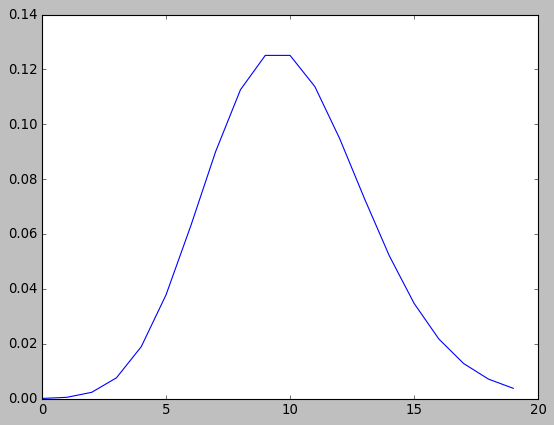

In [7]:
# Cookie generator
def factorial(x):
    if x > 1:
        xfact = x * factorial(x-1)
    else:
        xfact = 1
    return xfact

def poissonF(x, lam):
    y = 0
    if x >= 0:
        y = (lam**x * np.exp(-lam))/factorial(x)        
    return y

def cookie_generator(lam):
    random = np.random.uniform(0,1)
    chips = 0
    cum_prob = 0
    found = False
    while ~found:
        cum_prob = cum_prob + poissonF(chips, lam)
        if random <= cum_prob:
            found = True
            return chips
        else:
            chips = chips+1

print('number of chips in cookie: %d' % cookie_generator(10))
plt.plot([x for x in range(0,20)], [poissonF(x,10) for x in range(0,20)])
plt.show()

^A nice graph of the Poisson distribution 

Suppose a bag a cookies has 25 cookies in it. What is the average number of chips in the cookies in the bag $\overline{\rm{X}}$? 

We can build a generator for that too.

In [9]:
def bag(lam, cookies):
    return np.mean([cookie_generator(lam) for x in range(0,cookies-1)])

bag(10,25)

9.958333333333334

According to CLT, $\overline{\rm{X}} \sim \text{N}\left(\mu, \frac{\sigma^2}{n}\right)$

Let's try to visualise this by generating data

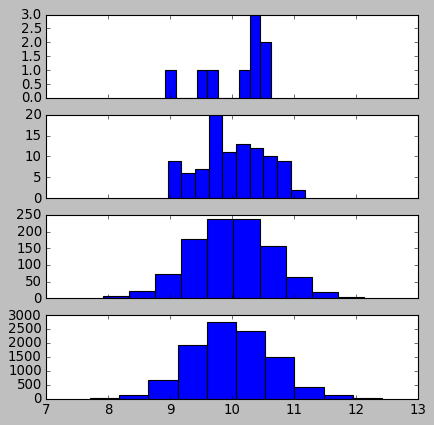

In [10]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [6, 6]
fig, axarr = plt.subplots(4,sharex=True,sharey=False)

axarr[0].hist([bag(10,25) for x in range(0,9)])
axarr[1].hist([bag(10,25) for x in range(0,99)])
axarr[2].hist([bag(10,25) for x in range(0,999)])
axarr[3].hist([bag(10,25) for x in range(0,9999)])

plt.show()

You can see the data getting more 'Gaussian' looking as the number of times we run the experiment increases. The last graph, with 10,000 experiments definately looks normal. Lets find the sample mean and sample variance of this set of results  

In [11]:
test = [bag(10,25) for x in range(0,9999)]
print('Mean: %f, Variance: %f' % (np.mean(test), np.std(test)**2))

Mean: 9.987170, Variance: 0.416751


By the CLT we would expect that the mean of the distribution of $\overline{X}$ would be the mean of chips in cookies $E(Chips)$, and the variance would be the variance of the chips divided by the number of samples, i.e. $\frac{Var(Chips)}{25}$ (i.e. divided by the sample size, the number of cookies in a bag)

We know both $Var(Chips)$ and $E(Chips)$ are $\lambda$, so we would expect $E\left(\overline{X}\right)$ to be around 10, which it is.

We would expect $Var\left(\overline{X}\right) = \frac{10}{25} = 0.4$ The actual results seem to be between 0.4 and 0.425. Not bad.

Try again with a different sample size, 60. Would expect variance to be 10/60 = 0.1667

In [12]:
test = [bag(10,60) for x in range(0,999)]
print('Mean: %f, Variance: %f' % (np.mean(test), np.std(test)**2))

Mean: 10.018578, Variance: 0.172347


Mean is still around 10 as expected. Variance comes about betwee 0.16 - 0.17. Our expectation from the CLT would be 10/60 = 1.67 